## Compare the Stock's performance w.r.t the Index Performance

- Author: Ayush Patel
- Github: https://github.com/Ayush-Patel15 
- LinkedIn: https://www.linkedin.com/in/ayush-15-patel/

<hr>

Compare the historical 6-months, 1-year and 3-year performance of the stock against the performance of Index. In simpler words, `whether the stock has outperform or underperform the index returns`. Before adding any stock in a portfolio for a long-term horizon, it's very important to analyze it's performance w.r.t Index. One can do the same process for short-term trades also, but the key problem is the noise in short-term i.e. the risk and volatility. However, it can be a great advantage, if one can track and pick the outperforming sector as early as possible.

I got to know about the concept, while working with a client on a freelancing project to find exit conditions or rebalancing conditions for a portfolio. At first, it's seems a bit confusing to me that how can we say that the asset has outperformed or underperformed the underlying, based on the cumulative P&L over a specified lookback period. Later on, I understood why it makes sense to do so. Let's discuss the same.

### Meaning of performance of a stock

It is as simple as it looks, the return of a stock calculated for a specified period is said to be it's performance. And based on the comparison with returns of an index, we can conclude, whether it has outperformed or underperformed the market.

`Example`: Let's say, the returns generated by a stock ABC is 15% for the particular year 2023-24. Now, how can we say that it's a good return or a bad return. For that, we need a benchmark i.e. returns of a broader index market, let's say the return of index is 10%. Now, we can conclude the stock ABC has outperform the market (15 > 10), and generated an alpha of 5% (15-10) over the market returns. Similar case can happen for underperformance, if the index returns were 20% for the year.

<hr>

### Ways to calculate

- One of the simplest way is to calculate the `absolute return` of the stock, for the specified period. The formula for that is: ((Final Value - Initial Value) / Initial Value) * 100. Then, compare that with the absolute returns of the index.

- Plot the movement of index, and the stock in terms of `cummulative returns` and then analyze. This is more intuitive and helpful in many terms, I will list them, in a bit. Normalize the movement of stock, and index in terms of returns and them plot it. Formula used for normalizing the movement is: (Current Price / Price[0]) * 100

<hr>

### Code of Plotting and saving in Python

As always, lets use python and observe the movement, and plots in terms of returns. The key points, for the purpose of learning are:

- Performing the analysis for a period of 1-year i.e. 252 days data, and the end date for that is 2024-12-27.
- Nifty50 is considered as the broad market index, and the benchmark to compare.
- Stocks included to demonstrate are: [APOLLOHOSP, ASIANPAINT, AXISBANK, BAJFINANCE, BRITANNIA, CIPLA, COALINDIA, GRASIM, HINDALCO, INFY, RELIANCE, TCS, TRENT, TITAN]
- Plot is saved in the \images folder.

In [42]:
## Import Statements
import matplotlib.pyplot as plt
import pandas as pd
import os

%matplotlib inline

In [43]:
## Folder path and create the list of all index names
DATA_FOLDERPATH = "E:\\Market-Work\\All-Data\\Daily_Data-Stocks_Indices"
all_stocks_list =  ["APOLLOHOSP", "ASIANPAINT", "AXISBANK", "BAJFINANCE", "BRITANNIA", "CIPLA", "COALINDIA", "GRASIM", "HINDALCO", "INFY", 
"RELIANCE", "TCS", "TRENT", "TITAN"]
lookback_period = 252

index_filepath = os.path.join(DATA_FOLDERPATH, "NIFTY50.csv")

In [44]:
## Function, to read the stock df, and merge it the main merged df, and plot the graph
def merge_the_stock_close_with_index(index_df, stock_name, lookback_period, DATA_FOLDERPATH):
	stock_csv = stock_name + ".csv"
	stock_filepath = os.path.join(DATA_FOLDERPATH, stock_csv)
	stock_df = pd.read_csv(stock_filepath, usecols=["Date","Close"]).rename(columns={"Close":stock_name})
	stock_df = stock_df[-lookback_period:]
	stock_df.set_index("Date", inplace=True)
	df_merged = pd.merge(left=index_df, right=stock_df, how="inner", left_index=True, right_index=True)
	percentage_change_prices = df_merged.divide(df_merged.iloc[0]) * 100

	## Plot using pandas, and save the graph
	ax = percentage_change_prices["Close"].plot(figsize=(10, 5), label="Nifty50", color="blue")
	percentage_change_prices[stock_name].plot(ax=ax, label=stock_name, color="green")
	plt.title(f"Normalized performance comparison of NIFTY vs {stock_name}")
	plt.xlabel("Date")
	plt.ylabel("Normalized Price (% Change from Start)")
	plt.legend()
	plt.savefig(f"Images\\NIFTY_vs_{stock_name}.png")
	plt.show()

`NOTE`: For the purpose of demo, I have sliced the all_stocks_list for fewer items, so it's easy to check. Because, plotting all the price series will lead to a larger notebook file. You can check the output of all stocks (all nifty50 stocks) in the `\images` folder on my github.

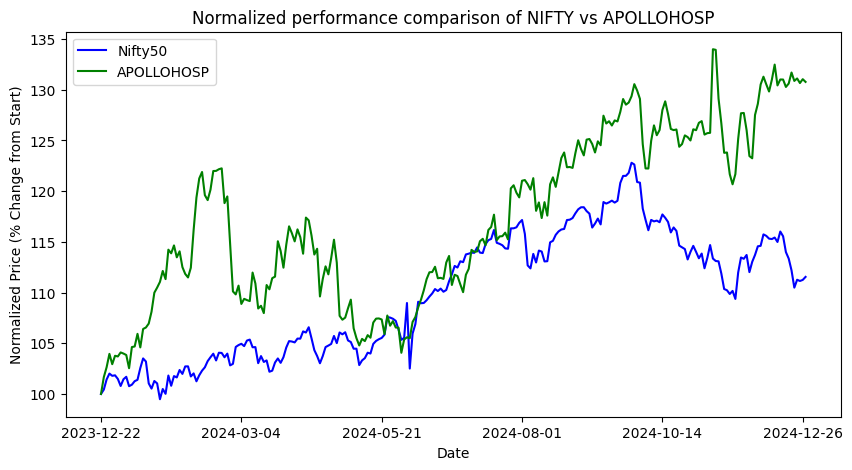

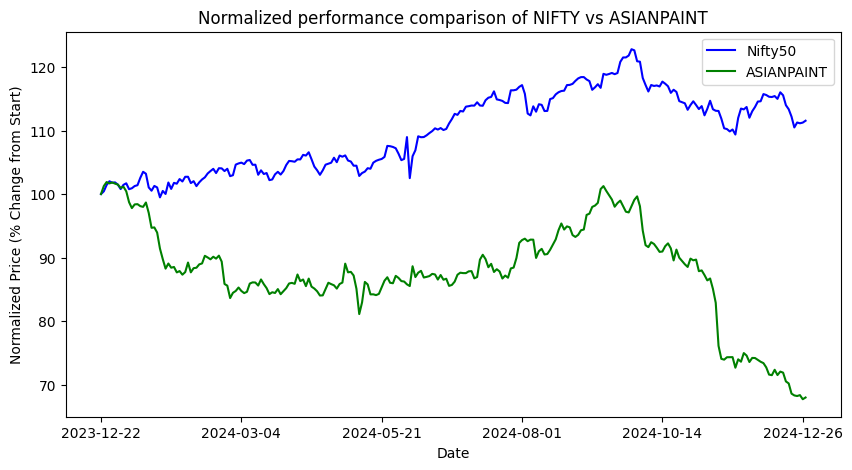

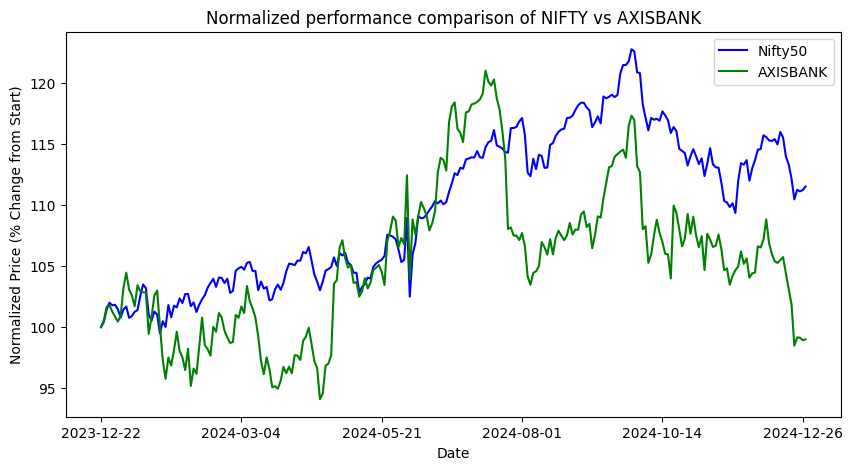

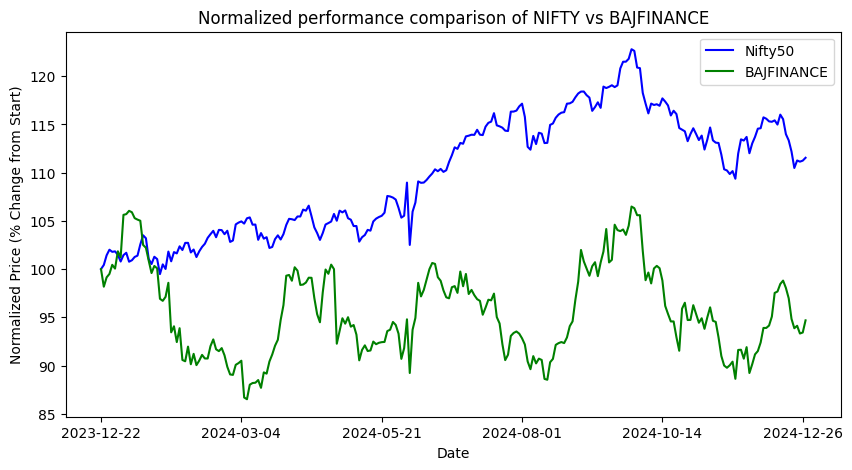

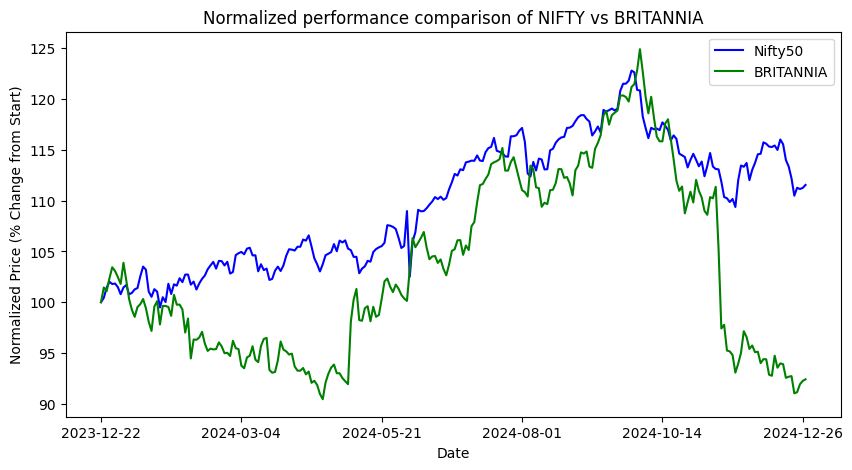

In [45]:
## Read the index dataframe, and loop on stocks
index_df = pd.read_csv(index_filepath, usecols=["Date","Close"])
index_df = index_df[-lookback_period:]
index_df.set_index("Date", inplace=True)

## Run the first 5 stocks only
for stock_name in all_stocks_list[:5]:
	merge_the_stock_close_with_index(index_df, stock_name, lookback_period, DATA_FOLDERPATH)

<hr>

### Advantages of Returns plot

Now, let's discuss about the advantages of this plot as said earlier:

- Control of lookback period input parameter, we can easily generate plots of different duration like 6 months, 3 years, 5 years, etc.
- Clear graphical visualisation of the movement of price of an asset, w.r.t to the movement of Index.
- Observe the series of cummulative returns, it seems similar to the price series. And if you have observed carefully, you must have noticed the points of crossover and crossdowns in the charts. The crossovers and crossdowns have persist for longer duration, or in simple terms stocks have followed their trends.
- One can try to build a strategy, based on this crossovers and crossdowns. 
- It is also helpful in portfolio management, when a stock starts to underperform the index, we can rebalance the portfolio for that asset.

`I am also trying to utilize this, and build some kind of strategy. As, it is not straight forward and easy. We need to optimize the lookback period, decide on entry and exit rules, some stoploss limits, and other parameters. But, it is evident that when a stock starts to underperform the index, it underperforms it for a while and remain intact with the trend.`

<hr>

## Interesting Fact

Try to plot a graph of cummulative returns of TRENT vs NIFTY of the past 10 years, this is called wealth creation.

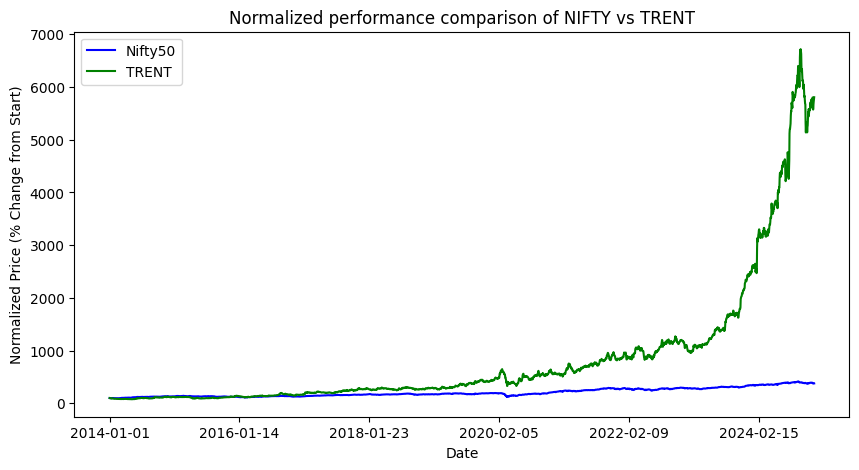

<hr>

### Usage of Performance

- Rebalancing of portfolio, based on the underperformance and outperformance of the stock. For Ex: Exit the assets that has underperfomed the market by a certain threshold. Similarly, Enter the stock when it is outperforming the market.
- Add it as a factor in a multi-factor model, and assign the weight accordingly. Ex: Let's say we filter the stocks based on high Delivery Volume Percentage as a factor, then filter the stocks based on the performance w.r.t to the index.
- The same concept can be used to analyze and compare the sectoral perfomance of different indices. Ex: Compare the performance of NIFTY AUTO, NIFTY FMCG, NIFTY METALS, NIFTY50, and etc. to check for sectoral rotation, or outperformance.

<hr>

`DISCLAIMER`: This is just for the purpose of knowledge and my own learning, and not any advice to create any kind of portfolio or invest in stocks. Do you own analysis and invest in markets. However, this is just for my own learning purpose, so need not to worry. For learning purpose, I can test for any weird possibilities, even if doesn't make any sense in the practical world.

Thank you for reading the complete section. If you have any suggestions or doubts, comment down below or message me on LinkedIn.

<hr>